**Part 1 ‐ Exploratory data analysis**

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import json

In [2]:
with open('logins.json') as login:
    log = json.load(login)
    logins = pd.DataFrame(log)

In [3]:
logins.head()

,login_time
0,1970-01-01 20:13:18
1,1970-01-01 20:16:10
2,1970-01-01 20:16:37
3,1970-01-01 20:16:36
4,1970-01-01 20:26:21


In [4]:
#chaning logintime to datetime object
logins['login_time'] = pd.to_datetime(logins['login_time'])

In [5]:
#sorting dates to find the start time in date column
logins_sorted = logins['login_time'].sort_values()

In [6]:
logins_sorted.head()
                  
                

6   1970-01-01 20:12:16
0   1970-01-01 20:13:18
1   1970-01-01 20:16:10
3   1970-01-01 20:16:36
2   1970-01-01 20:16:37
Name: login_time, dtype: datetime64[ns]

In [7]:
#setting logintime as index so that resample could be done
logins.set_index('login_time', inplace=True)

In [9]:
# finding how many times they have logged within the 15 minutes time period
#setting offset time 12min16sec, so that the 15 min will be counted from that time onwards

logins['count'] = 1
df = logins.resample("15T", offset='12min16s').agg({'count':'sum'})

In [10]:
df.head()

,count
login_time,
1970-01-01 20:12:16,8
1970-01-01 20:27:16,8
1970-01-01 20:42:16,6
1970-01-01 20:57:16,3
1970-01-01 21:12:16,3


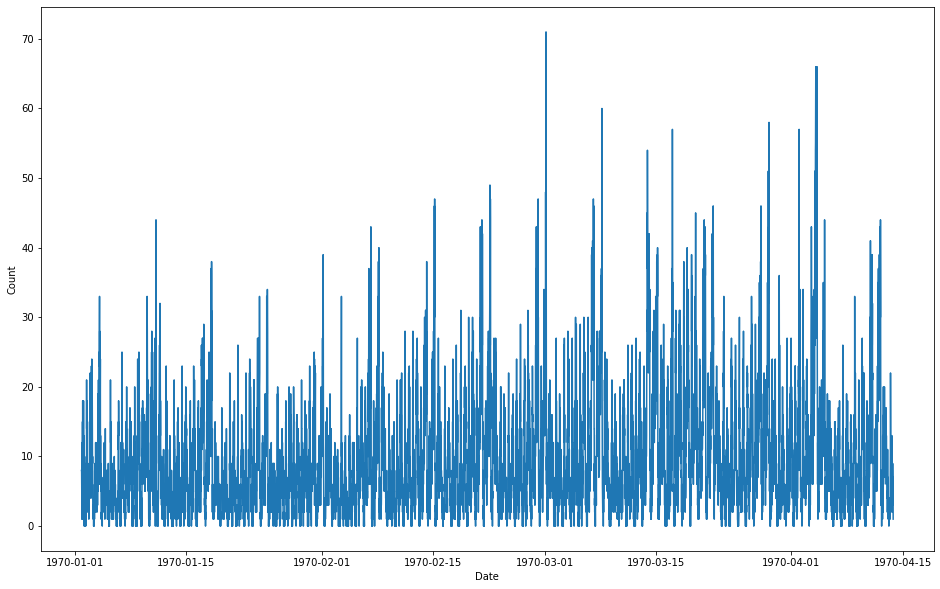

In [11]:
# Plotting frequency of logins
plt.figure(figsize = (16,10))
plt.plot(df)
plt.xlabel('Date')
plt.ylabel('Count')
plt.show()

In [12]:
df_daily = df.resample('D').mean()
df_hour = df.resample('H').mean()

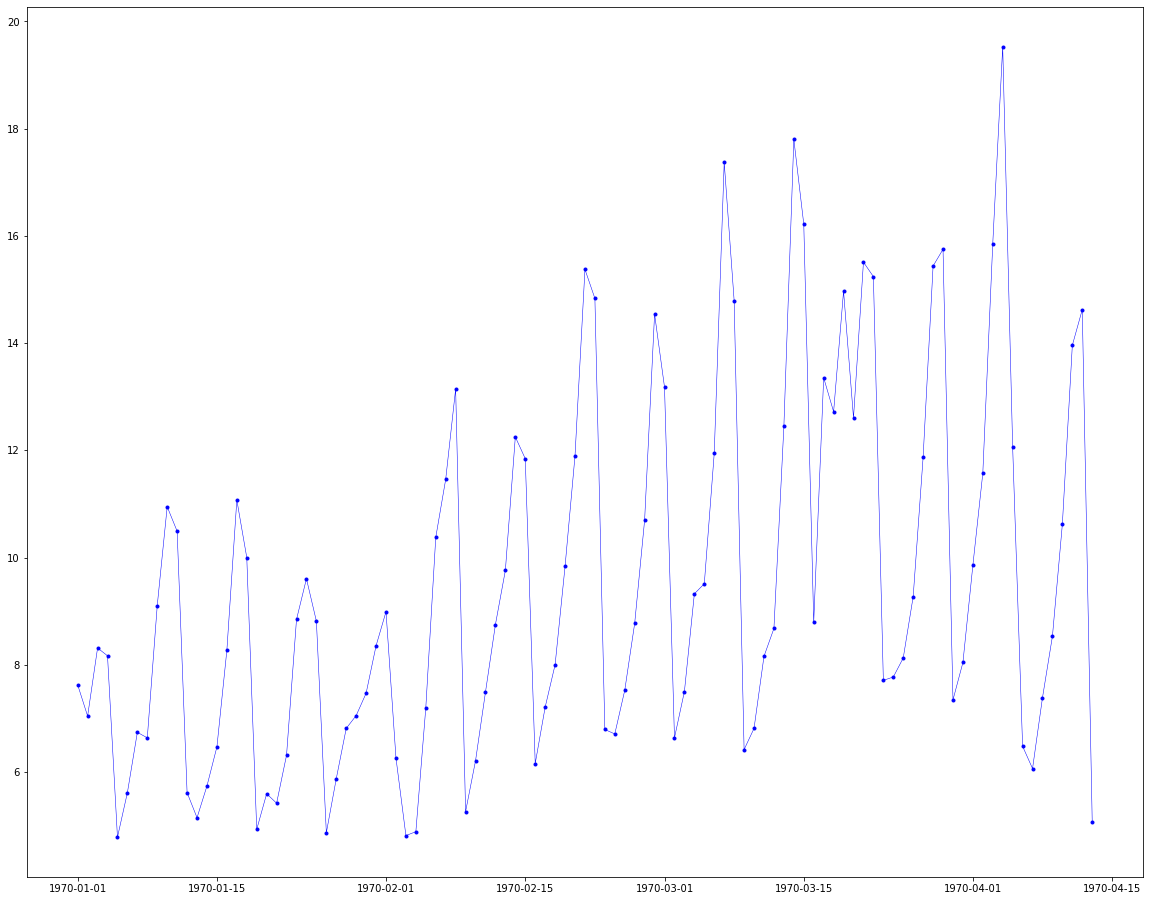

In [20]:
start, end = '1970-01-01', '1970-04-15'
fig, ax = plt.subplots(figsize=(20,16))
ax.plot(df_daily.loc[start:end, 'count'], marker='.', linestyle='-', linewidth = 0.5, label='Daily', color='blue')



In the above plot (Which I made it to daily series) we find both a trend and seasonal components, we find a seasonal pattern (an obelisk/pyramid) that repeats every 7-9 days (could be weekly). For instance, it peaks certain day of week and then plummets. Reaches a peak during April 1st and then again it goes down. From Jan-01 to Ap-01, it also looks like there's an increasing trend in the series.


**Part 2 ‐ Experiment and metrics design**

1,2
a) The experiment would be, for taxi drivers, they will pay oneway toll fee when they go from Gotham/Metroplois to Metropoli/Gotham and  reimburse the toll fee ONLY if they return to Gotham/Metropolis before the end of the day. This will motivate the drivers to serve both cities without any fee.
Since Gotham is mostly active in the night, it would be beneficial for a driver to go from Gotham to Metropolis during the mornings and serve in Metropolis during the day and go back to Gotham for night rides. During the weekends they get the flexibility to stay in either one of the city.

Implementation: starting 30 days before the experiment, record how many times a particular driver has passed the toll twice in a day. Again record how many days a particular driver has passed the toll twice in a day after the experiment.
data would look like the following:

           Before experiment      After Experiment  difference
 Driver 1       t1i                    t2i           t2i - t1i
 Driver 2       t1j                    t2j           t2j - t1j
 Driver 3       t1k                    t2k           ..
  ....          ...                    ...           ..

Getting t1 and t2 measures from atleast 30 drivers will make it viable for normality.
We will have to do a 'Paired t test' to examine this hypothesis

     Null hypothesis : mean(t2 - t1) = 0
     Alternative hypothesis: mean(t1 - t2) > 0
      
     calculated t statistic = mean(t2 - t1)/ standard deviation(t2-t1)/Sqrt(n)   
     (in this case, n would be the total number of drivers we collected both t1 and t2 measures)
     
     Look for the t table value (for alpha=0.05 and degrees of freedom = n-1), one tail table value.
     If the calculated t statistic is higher than the table t value, then we reject the null and conclude the difference between the number of times drivers passed the toll twice is significantly higher than that of the times they have passed before the experiment.
     
This experiment is based on several assumptions that t1 should be compared with t2 of same driver. Difference between t1 and t2 are normally distributed. Collecting both before and after measurements from higher number of drivers is beneficial and can be generalized to the population. Also the time before and after experiments should be somewhat similar in a particular city so that we conclude that the difference is only due to experiment and not due to any other special event in a city.